
# Árbol de Decisión (Clasificación multiclase) con **Wine** (sklearn)

Este cuaderno es muy parecido al anterior, pero usa el dataset **Wine** de `scikit-learn` (178 filas, 13 variables, 3 clases).
Incluye:
- Carga y exploración
- Split **train/test** estratificado
- Entrenamiento con **Gini** (y opción Entropy)
- Métricas: accuracy y `classification_report`
- **Matriz de confusión**
- Visualización del **árbol** y **importancias**
- **GridSearchCV** (tuning)
- Curva de **validación** por `max_depth`
- **ROC-AUC macro One-vs-Rest** (métrica multiclase)


In [1]:
# importar librerias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
from sklearn.preprocessing import label_binarize

np.random.seed(42)


In [ ]:
# Carga de datos
ds = load_wine()
X = pd.DataFrame(ds.data, columns=ds.feature_names)
y = pd.Series(ds.target, name="target")  # 0,1,2
class_names = ds.target_names

print("Dimensiones:", X.shape)
X.head()


Dimensiones: (178, 13)


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


| Variable                            | Descripción                               | Tipo de dato     | Comentario                                             |
| ----------------------------------- | ----------------------------------------- | ---------------- | ------------------------------------------------------ |
| **alcohol**                         | Contenido de alcohol en el vino           | Numérico (float) | Grado alcohólico de la muestra                         |
| **malic\_acid**                     | Cantidad de ácido málico                  | Numérico         | Influye en la acidez y sabor del vino                  |
| **ash**                             | Cantidad de ceniza en el vino             | Numérico         | Residuo mineral después de la combustión               |
| **alcalinity\_of\_ash**             | Alcalinidad de la ceniza                  | Numérico         | Relacionada con la composición mineral                 |
| **magnesium**                       | Contenido de magnesio (mg/L)              | Numérico         | Influye en la estabilidad y sabor                      |
| **total\_phenols**                  | Fenoles totales                           | Numérico         | Contribuyen a color, sabor y propiedades antioxidantes |
| **flavanoids**                      | Flavonoides totales                       | Numérico         | Tipo de polifenol, importante para sabor y aroma       |
| **nonflavanoid\_phenols**           | Fenoles no flavonoides                    | Numérico         | También afectan sabor y color pero en menor grado      |
| **proanthocyanins**                 | Proantocianidinas                         | Numérico         | Polifenoles que contribuyen al color y amargor         |
| **color\_intensity**                | Intensidad del color                      | Numérico         | Medida óptica de cuán oscuro es el vino                |
| **hue**                             | Matiz del color                           | Numérico         | Relación entre diferentes longitudes de onda del color |
| **od280/od315\_of\_diluted\_wines** | Relación de absorbancia a 280 nm y 315 nm | Numérico         | Indicador de calidad y madurez                         |
| **proline**                         | Contenido de prolina                      | Numérico         | Aminoácido, indicador del origen y calidad de la uva   |


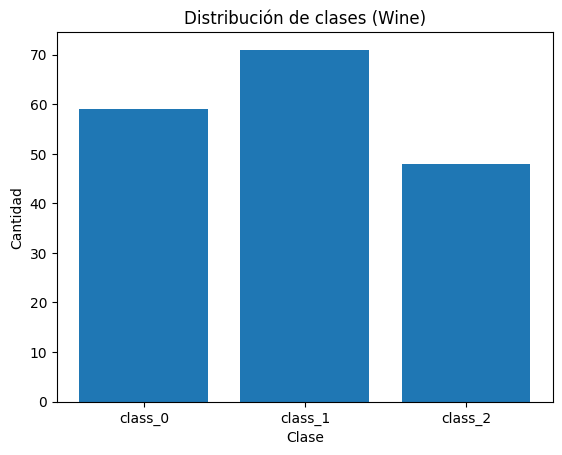

In [ ]:
# Distribución de clases
counts = y.value_counts().sort_index()
plt.figure()
plt.bar(range(len(counts)), counts.values)
plt.xticks(range(len(counts)), class_names, rotation=0)
plt.title("Distribución de clases (Wine)")
plt.xlabel("Clase")
plt.ylabel("Cantidad")
plt.show()


In [ ]:
# Sepración Train/Test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, stratify=y, random_state=42
)
X_train.shape, X_test.shape


((133, 13), (45, 13))

Accuracy test (gini): 0.956

Reporte de clasificación (gini):
               precision    recall  f1-score   support

     class_0       1.00      0.93      0.97        15
     class_1       0.90      1.00      0.95        18
     class_2       1.00      0.92      0.96        12

    accuracy                           0.96        45
   macro avg       0.97      0.95      0.96        45
weighted avg       0.96      0.96      0.96        45



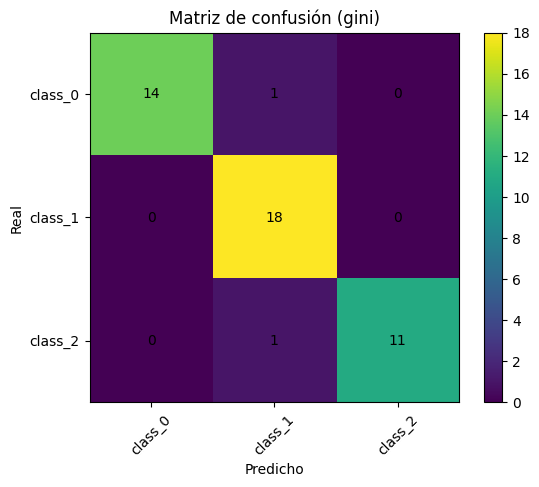

In [ ]:
#  Entrenamiento Árbol (Gini)
clf = DecisionTreeClassifier(criterion="gini", random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy test (gini): {acc:.3f}")
print("\nReporte de clasificación (gini):\n", classification_report(y_test, y_pred, target_names=class_names))

cm = confusion_matrix(y_test, y_pred)
plt.figure()
plt.imshow(cm, interpolation='nearest')
plt.title("Matriz de confusión (gini)")
plt.xticks(range(len(class_names)), class_names, rotation=45)
plt.yticks(range(len(class_names)), class_names)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i, j], ha='center', va='center')
plt.xlabel("Predicho")
plt.ylabel("Real")
plt.colorbar()
plt.show()


In [ ]:
# [roc-ovr] ROC-AUC macro (multiclase, One-vs-Rest)
# Para multiclase, binarizamos etiquetas y calculamos AUC macro
if hasattr(clf, "predict_proba"):
    y_test_bin = label_binarize(y_test, classes=[0,1,2])
    y_score = clf.predict_proba(X_test)
    auc_macro = roc_auc_score(y_test_bin, y_score, average="macro", multi_class="ovr")
    print(f"ROC-AUC macro (OvR): {auc_macro:.3f}")
else:
    print("El clasificador no soporta predict_proba para ROC-AUC.")


ROC-AUC macro (OvR): 0.963


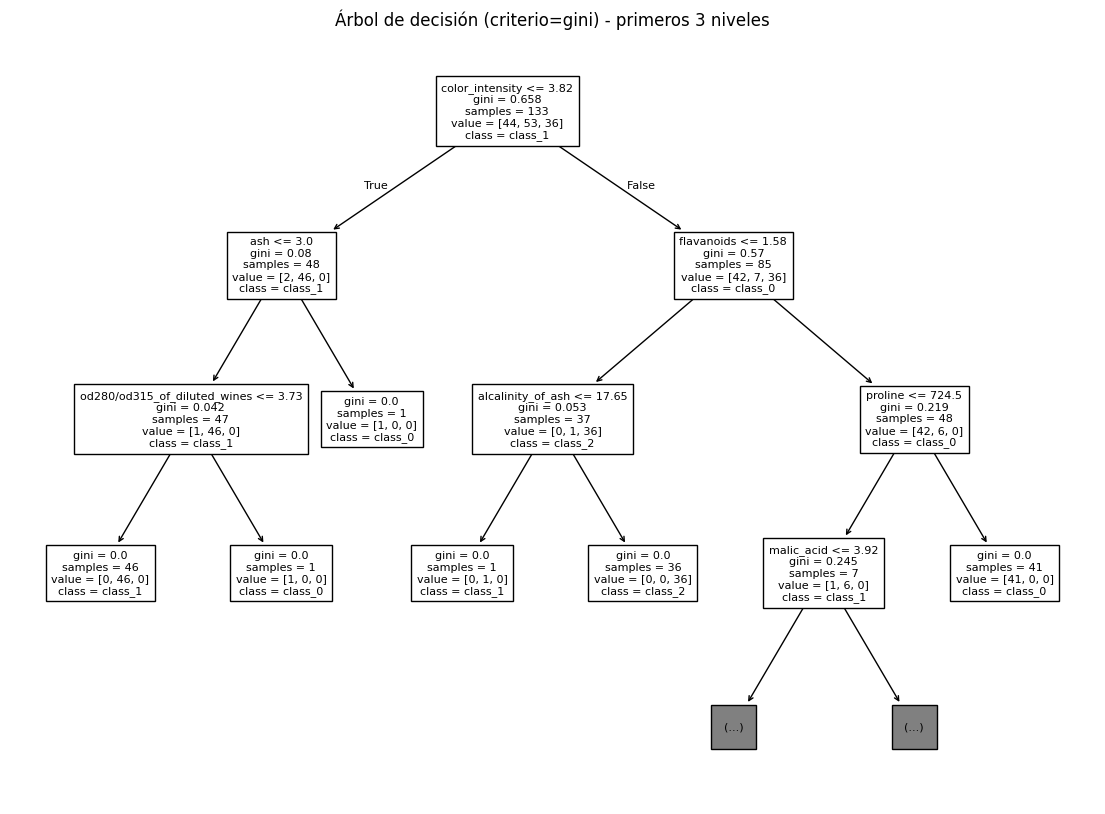

In [ ]:
# Visualización del árbol (primeros niveles)
plt.figure(figsize=(14, 10))
plot_tree(clf, feature_names=X.columns, class_names=class_names, filled=False, max_depth=3, fontsize=8)
plt.title("Árbol de decisión (criterio=gini) - primeros 3 niveles")
plt.show()


flavanoids                      0.410802
color_intensity                 0.403317
proline                         0.100318
od280/od315_of_diluted_wines    0.022351
alcalinity_of_ash               0.022219
ash                             0.021419
malic_acid                      0.019574
magnesium                       0.000000
alcohol                         0.000000
proanthocyanins                 0.000000
dtype: float64


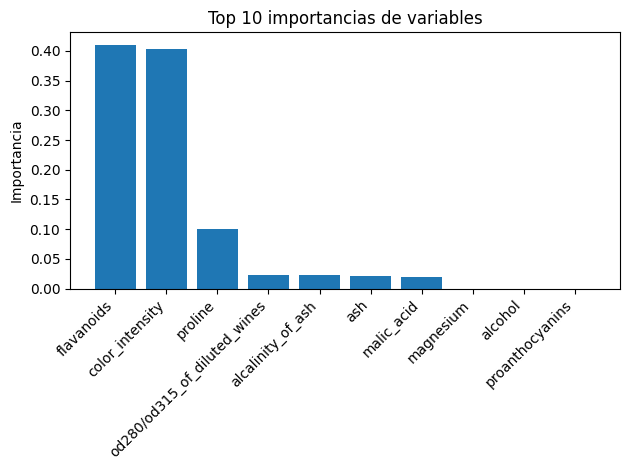

In [ ]:
# Importancias de variables
importances = pd.Series(clf.feature_importances_, index=X.columns).sort_values(ascending=False)
print(importances.head(10))

plt.figure()
plt.bar(importances.index[:10], importances.values[:10])
plt.xticks(rotation=45, ha='right')
plt.title("Top 10 importancias de variables")
plt.ylabel("Importancia")
plt.tight_layout()
plt.show()


In [ ]:
# Tuning con GridSearchCV
param_grid = {
    "criterion": ["gini", "entropy"],
    "max_depth": [None, 3, 4, 5, 6, 8, 10],
    "min_samples_split": [2, 5, 10, 20],
    "min_samples_leaf": [1, 2, 4, 8]
}
grid = GridSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_grid=param_grid,
    cv=5,
    n_jobs=None
)
grid.fit(X_train, y_train)
print("Mejores parámetros:", grid.best_params_)

best = grid.best_estimator_
y_pred_best = best.predict(X_test)
print("\nAccuracy (mejor modelo):", accuracy_score(y_test, y_pred_best))
print("\nReporte de clasificación (mejor modelo):\n", classification_report(y_test, y_pred_best, target_names=class_names))


Mejores parámetros: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 10}

Accuracy (mejor modelo): 0.9555555555555556

Reporte de clasificación (mejor modelo):
               precision    recall  f1-score   support

     class_0       1.00      0.87      0.93        15
     class_1       0.90      1.00      0.95        18
     class_2       1.00      1.00      1.00        12

    accuracy                           0.96        45
   macro avg       0.97      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



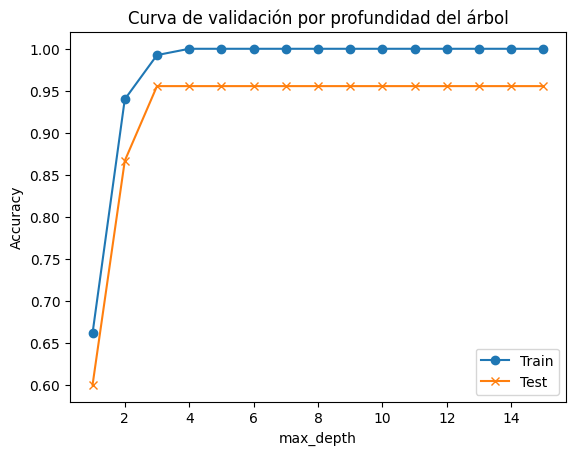

In [ ]:
# [validation] Curva de validación por max_depth
depths = list(range(1, 16))
acc_train, acc_test = [], []

for d in depths:
    m = DecisionTreeClassifier(random_state=42, max_depth=d)
    m.fit(X_train, y_train)
    acc_train.append(m.score(X_train, y_train))
    acc_test.append(m.score(X_test, y_test))

plt.figure()
plt.plot(depths, acc_train, marker='o', label='Train')
plt.plot(depths, acc_test, marker='x', label='Test')
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.title("Curva de validación por profundidad del árbol")
plt.legend()
plt.show()
